# Courbes de niveau

## Table des mati√®res

- Pr√©ambule

  - D√©pendances logicielles

  - Diff√©rentiation automatique

- Ensembles de niveau

  - Exemples de r√©f√©rence

  - Analyse des ensembles de niveau (Q1, Q2, Q3, Q4)

- Construction des courbes de niveau

  - M√©thode de Newton (Q5, T1, T2)

  - G√©n√©ration des points (Q6, T3)

  - Bouclage et auto-intersection (Q7, T4, T5)

- Post-traitement

  - Interpolation (Q8, T6)

  - Int√©gration (T7, T8)

## Pr√©ambule

### D√©pendances logicielles 

In [1]:
# Python Standard Library
# -----------------------
pass

In [2]:
# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

### Diff√©rentation automatique

On d√©finit ici deux fonctions utilitaires, `grad` et `J`, permettant de calculer simplement le gradient d'une fonction scalaire de deux variables r√©elles et la matrice jacobienne d'une fonction vectorielle de deux variables r√©elles.

In [3]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [4]:
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

#### Exemples d'usage

In [5]:
def f(x, y):
    return np.sin(x) + 2.0 * np.sin(y)

grad_f = grad(f)

grad_f(0.0, 0.0) # array([1., 2.])

array([1., 2.])

In [6]:
def f(x, y):
    return np.array([x + 2 * y, 3 * x + 4 * y])

J_f = J(f)

J_f(0.0, 0.0) # array([[1., 2.], [3., 4.]])

array([[1., 2.],
       [3., 4.]])

#### Pr√©cautions

Les deux sources d'erreurs (avec messages cryptiques) les plus communes avec autograd :

**Selection de NumPy**

N'importez pas NumPy directement, par exemple avec

    >>> import numpy as np # Wrong !

mais importez le module `numpy` qui a √©t√© modifi√© par `autograd` (pour que les fonctions du module "coop√©rent" avec les algorithmes de diff√©rentiation automatique). 

    >>> import autograd.numpy as np # Right !
    
Utilisez-le ensuite comme vous le feriez avec NumPy classique.

**Utilisez des doubles**

Les fonctions g√©n√©r√©es par autograd sont strictes quand au type des nombres utilis√©s (plus strictes que les fonctions NumPy) : il doit s'agir de doubles. Par exemple, si l'on d√©finit

    >>> def add(x, y):
    ...    return x + y
    >>> grad_add = grad(add)

Alors `grad_add(0.0, 0.0)` renvoie `array([1.0, 1.0])`, mais `grad_add(0, 0)` g√©n√®re une erreur, car ses arguments sont des entiers et non des doubles.


## Ensembles de niveau

On appelle *ensemble de niveau* $c \in \mathbb{R}$ d'une fonction $f : \mathbb{R}^2 \to \mathbb{R}$  l'ensemble du plan
$$
\{(x_1,x_2) \in \mathbb{R}^2 \; | \; f(x_1, x_2) = c\}.
$$


### Exemples de r√©f√©rence

On d√©finit ici quelques fonctions qui pourront servir de r√©f√©rence pour valider les algorithmes de g√©n√©ration de courbes de niveau. On pourra √©galement utiliser la fonction utilitaire `display_contour` ci-dessous, qui exploite [la fonction `contour` de Matplotlib](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html) pour repr√©senter une collection d'ensembles de niveau.

In [7]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

#### Fonction quadratique

In [8]:
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

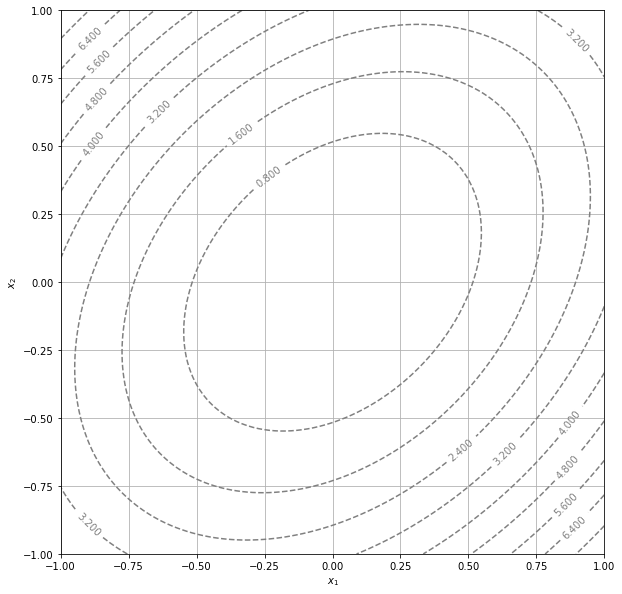

In [9]:
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

#### Fonction de Rosenbrock

Source : [Fonction de Rosenbrock, Wikip√©dia](https://en.wikipedia.org/wiki/Rosenbrock_function)

$$
f_2 : (x_1,x_2) \in \mathbb{R}^2 \mapsto (x_1 - 1)^2 + (x_1 - x_2^2)^2
$$

In [10]:
def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

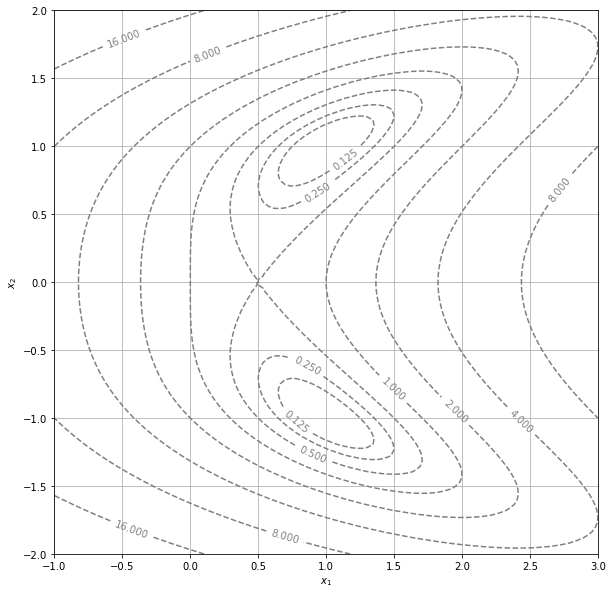

In [11]:
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

#### Fonction complexe

Source: [Courbe implicite, Wikip√©dia](https://en.wikipedia.org/wiki/Implicit_curve)

In [12]:
def f3(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) 

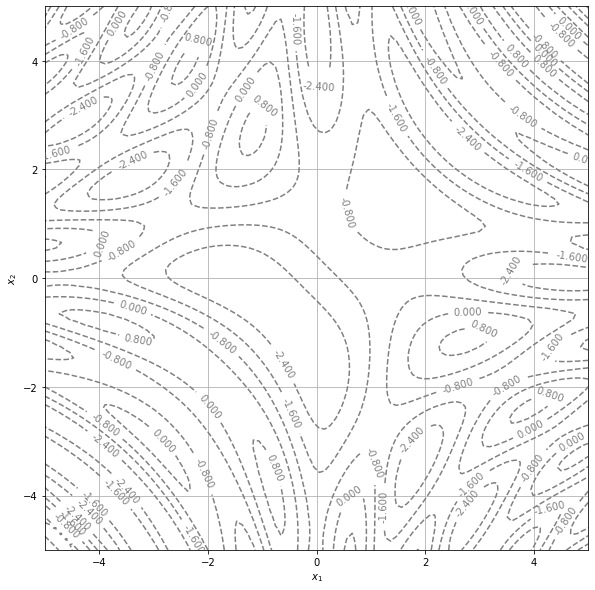

In [13]:
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

### Analyse des ensembles de niveau

#### Question 1

Soit $c \in \mathbb{R}$.
On suppose que la fonction $f:\mathbb{R}^2 \to \mathbb{R}$ est continue et v√©rifie
$f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$.
Que peut-on dire de l'ensemble de niveau $c$ de $f$ ?

##### R√©ponse 1
Montrons que l'ensemble $E$ =  \{ $(x_1, x_2)$ | $f(x_1, x_2) = c$ }  est ferm√© born√©.

##### Ferm√© :

On pose $g = f -c$

$g$ est continue car $f$ est continue, et on a : $E$ = $g^{-1}$(\{0})

Or {0} est ferm√© et $g$ est continue, donc $g^{-1}$(\{0}) l'est aussi.

Ainsi, $E$ est ferm√©.


##### Born√© :

comme $f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$ , 

$\forall A \in \mathbb{R},  \exists (x_{10}, x_{20}),
\forall (x, y),
(||(x, y)|| > ||(x_{10}, x_{20})||
\Rightarrow |f(x, y)| > A)$

Pour $A = c$, soit donc $(x_1, y_1)$ tel que pour tout $(x, y)$ tel que $||(x, y)|| > ||(x_1, y_1)||$, on ait $|f(x, y)| > c$.

On a donc que tous les points de $E$ v√©rifient $||(x, y)|| < ||(x_1, y_1)||$.

Donc $E$ est born√© car $E \subset B_F(0, ||(x_1, y_1)||)$.

Dans la suite la fonction $f$ est suppos√©e contin√ªment diff√©rentiable. On suppose √©galement que le gradient $\nabla f$ ne s'annule pas dans un voisinage du point $x_0 = (x_{10}, x_{20}) \in \mathbb{R}^2$. On pose alors
$$
p(x_1, x_2) := \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20}).
$$




#### Question 2
Comment interpr√©ter g√©om√©triquement le terme $p(x_1,x_2)$ ?

##### R√©ponse 2

$p(x_1, x_2)$ correspond au produit vectoriel
$\left( \begin{array}{c}
x_1 - x_{10} \\
x_2 - x_{20}
\end{array} \right)$
avec $\frac { \nabla f(x_0)}{||\nabla f(x_0)||} $ et repr√©sente la projection de


$\left( \begin{array}{c}
x_1 \\
x_2
\end{array} \right)$
sur la tangente √† la courbe repr√©sentative de f en $x_0$, qui est orthogonale √† $\nabla f(x_0)$. C'est donc la distance de $(x_1, x_2)$ √† la droite port√©e par $\nabla f(x_0)$.


#### Question 3

Montrer que dans un voisinage ouvert de $x_0$, on peut param√©triser l'ensemble de niveau $c:=f(x_0)$ au moyen de $p(x_1,x_2),$ c'est-√†-dire qu'il existe un $\varepsilon > 0$ et une fonction (contin√ªment diff√©rentiable) $\gamma :\left]-\varepsilon,\varepsilon \right[ \to \mathbb{R}^2$ tels que dans un voisinage ouvert de $x_0,$ $f(x_1,x_2) = c$ si et seulement si $(x_1, x_2) = \gamma(t)$ o√π $t = p(x_1, x_2)$.

##### R√©ponse

On pose                

$\begin{array}{ccccc}
g & : & \mathbb{R}^2 \times \mathbb{R} & \to & \mathbb{R}^2 \\
 & & (x_1, x_2, t) & \mapsto & (f(x_1, x_2) - c,\ t - p(x_1, x_2)) \\
\end{array}$

On a : 
   $ g(x_1, x_2, t) = 0 \Leftrightarrow $ 
$\left
\{
\begin{array}{c}
f(x_1, x_2) = c\\ t = p(x_1, x_2)
\end{array}
\right.$

Calculons $\partial g_x(x_0, t_0)$ o√π $t_0 = p(x_0)$ est tel que $g(x_0, t_0) = 0$

$\partial g_x(x_0, t_0) = 
\begin{pmatrix}
\partial_1 f(x_0) & \partial_2 f(x_0) \\ -\partial_1 p(x_0) & -\partial_2 p(x_0)
\end{pmatrix} = 
\begin{pmatrix}
   \partial_1 f(x_0) & \partial_2 f(x_0) \\
   -\frac{\partial_2 f(x_0)}{||\nabla f(x_0)||}& -\frac{\partial_1 f(x_0)}{||\nabla f(x_0)||}
\end{pmatrix}$

On calcule $det \partial g_x(x_0, t_0) = \frac{\partial_1^2 f(x_0) + \partial_2^2 f(x_0)}{||\nabla f(x_0)||} = ||\nabla f(x_0)|| \ne 0$.

Donc $\partial g_x(x_0, t_0)$ est inversible. 

D'apr√®s le th√©or√®me des fonctions implicites, il existe donc un voisinage de 0, not√© $]-\varepsilon, \varepsilon[$, et une fonction
\begin{equation}
\gamma:
\left|
  \begin{array}{rcl}
    ]-\varepsilon, \varepsilon[ \to \mathbb{R}^2 \\
    t \longmapsto \gamma(t) \\
  \end{array}
\right.
\end{equation}
continuement diff√©rentiable et telle que $\gamma(t) = (x_1, x_2)$

#### Question 4

Montrer que pour tout $t \in \left]-\varepsilon, \varepsilon \right[$ :

  - le vecteur $\gamma'(t)$ est non nul (il fournit donc une tangente au chemin $\gamma$),

  - est orthogonal √† $\nabla f(\gamma(t))$.

##### R√©ponse 4

On a : $(ùë•1, ùë•2) = ùõæ(ùë°)$ et $ùë° = ùëù(ùë•1, ùë•2)$ donc $(ùë•1, ùë•2) = ùõæ(ùëù(ùë•1, ùë•2))$. 

Ainsi, $ùõæ\circ ùëù$ est √©gale √† l'identit√© sur un voisinage de (ùë•1, ùë•2) dont $]‚àíùúÄ,ùúÄ[$ est l'image par $ùõæ$, donc ùõæ est inversible sur $]‚àíùúÄ,ùúÄ[$. 

On a donc que la d√©riv√©e $ùõæ‚Ä≤(ùë°)$ ne s'annule pas sur $]‚àíùúÄ,ùúÄ[$.

Puis on calcule $\nabla f(\gamma(t))\bullet \gamma'(t)$

Comme $f(\gamma(t)) = c$, on a en d√©rivant par rapport √† $t$ que $\nabla f(\gamma(t))\bullet \gamma'(t) = 0$

Donc les deux vecteurs sont bien orthogonaux. 




## Construction des courbes de niveau

### M√©thode de Newton

Afin de trouver des points sur des courbes de niveau, on souhaite impl√©menter un algorithme de r√©solution des √©quations de la forme $F(x) = 0$ o√π $F: \mathbb{R}^2 \to \mathbb{R}^2$, par la m√©thode de Newton, amorc√©e par un point de r√©f√©rence $x_0 \in \mathbb{R}^2$.

L'impl√©mentation prendra la forme g√©n√©rale donn√©e ci-dessous. L'appel `x, y = Newton(F, x0, y0, eps, N)` devra renvoyer le couple des coordonn√©es d'un point $(x, y)$ qui est une solution approch√©e de $F(x,y)=0$ √† proximit√© de $(x_0, y_0)$. La qualit√© de l'approximation produite est d√©termin√©e par le r√©el positif $\varepsilon > 0$, une approximation de la distance entre le point $(x,y)$ renvoy√© par la fonction et la solution exacte. L'algorithme it√©ratif s'interrompra si aucune approximation de la pr√©cision souhait√©e n'a √©t√© trouv√©e en $N$ √©tapes. 

#### Question 5

L'application √† laquelle nous destinons la fonction `Newton` demande-t'elle une grande pr√©cision ?
Choisir une valeur de `eps` qui semble raisonnable et justifier l'ordre de grandeur choisi.

##### R√©ponse 5
Un ordre de grandeur de l'epsilon machine serait trop petit (demande trop pr√©cise)
Vu les valeurs des courbes de niveau √©tudi√©es (pr√©cision d'environ $10^{-2}$), on peut se restreindre √† $\varepsilon = 10^{-3}$

In [14]:
N = 100
eps = 0.001

#### T√¢che 1

Impl√©menter la fonction `Newton` en compl√©tant le canevas ci-dessous

In [15]:
c = 0.8  # on d√©finit la valeur de c au d√©but.

def Newton(F, x0, y0, N=100, eps=eps):
    x0, y0 = float(x0), float(y0) # on s'assure que les valeurs sont des flottants
    X0 = np.array([x0, y0])
    X = X0
    Jacob = J(F)    
    J_inv = np.linalg.inv(Jacob(x0, y0))
    for i in range(N):
        X = X - np.dot(J_inv, F(x0, y0))
        x = X[0]
        y = X[1]
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps :
            return x, y
        x0, y0 = x, y
    else :
        raise ValueError(f"no convergence in {N} steps")

#### T√¢che 2

Testez votre impl√©mentation de la fonction `Newton` ! On sugg√®re par exemple de l'utiliser pour chercher un point $(x_1, x_2)$ de la ligne de niveau $0.8$ de $f_1$ (cf. Exemples de r√©f√©rence) qui v√©rifie en outre $x_1 = x_2$ en utilisant le point initial $(0.8, 0.8)$. Puis de faire varier le point initial, la contrainte suppl√©mentaire, etc. et de repr√©senter graphiquement les r√©sultats.

##### R√©ponse t√¢che 2
On a besoin de fonctions $F$ de $\mathbb{R}^2$ dans $\mathbb{R}^2$ pour √™tre compatible avec notre algorithme de Newton. Il faut donc rajouter une contraine suppl√©mentaire sur $f$ qui soit r√©alis√©e lorsque $F(x, y) = 0$

In [16]:
# On cr√©e une fonction de R2 dans R2 compatible avec Nexton et correspondant √† f1 de l'√©nonc√©, avec la condition suppl√©mentaire que x=y
def F1(x, y):     
    return np.array([f1(x, y)-c, x - y])

# autre fonction de R2 dans R2 dont la contrainte suppl√©mentaire est : x=12y
def G1(x, y):
    return np.array([f1(x, y) - c, x - 12 * y]) 



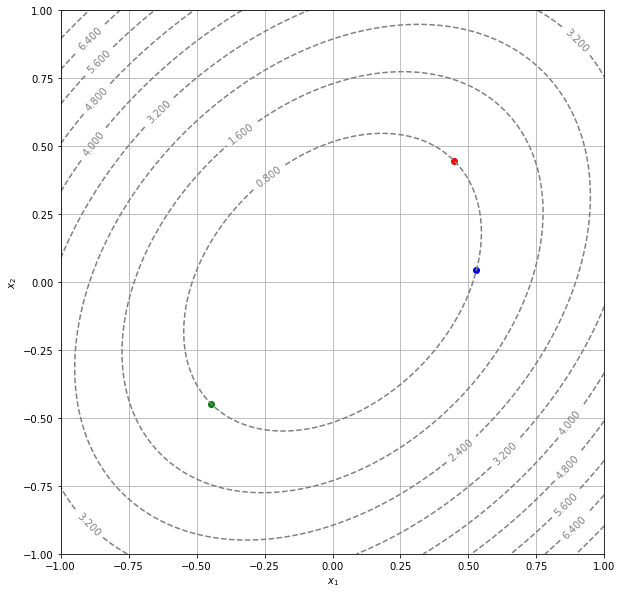

In [17]:
x1, y1 = Newton(F1, 0.8, 0.8) # point avec (x0, y0) = (0.8, 0.8) et la contrainte x=y
x2, y2 = Newton(G1, 0.8, 0.8) # point avec (x0, y0) = (0.8, 0.8) et la contrainte x= 12y
x3, y3 = Newton(F1, -0.5, -0.5) # point avec (x0, y0) = (0.5, 0.5) et la contrainte x=y

display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.scatter(x1, y1, c = 'red')
plt.scatter(x2, y2, c = 'blue')
plt.scatter(x3, y3, c = 'green')
plt.show()

### G√©n√©ration des points

#### Question 6 + T√¢che 3
Comment, en partant d'un point de r√©f√©rence $(x_0, y_0)$ tel que $f(x_0, y_0)=c$, peut-on g√©n√©rer avec la m√©thode de Newton un point $(x_1, y_1)$ √©galement tel que $f(x_1, y_1) = c$, mais √† une distance $\delta > 0$ de $(x_0, y_0)$ et qui soit "√† droite" quand on est en $(x_0, y_0)$ et qu'on regarde dans la direction de $\nabla f(x_0, y_0)$ ? Impl√©menter la fonction `level_curve` qui r√©p√®te ce proc√©d√© $N-1$ fois et renvoie un tableau NumPy de taille `(2, N)` contenant les coordonn√©es des points correspondants, puis valider graphiquement le r√©sultat au moyen des exemples de r√©f√©rence.

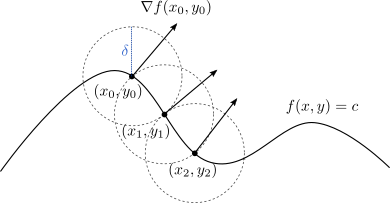

In [18]:
def level_curve(f, x0, y0, delta=0.1, N=1000, eps=eps):
    c = f(x0, y0)
    # d√©sormais la valeur de la courbe de niveau est donn√©e par f(x0, y0)
    
    # La fonction F de R2 dans R2 associ√©e √† la courbe de niveau c de f avec la condition que la distance √† (x0, y0) soit √©gale √† delta
    def F(x, y): 
        return np.array([f(x, y)-c, np.sqrt((x-x0)**2 + (y-y0)**2) - delta]) 
    
    x0, y0 = float(x0), float(y0)
    gradf = grad(f)
    Liste_points = [[x0, y0]] # la liste des points trouv√©s par la m√©thode de Newton
    x, y = x0, y0
    
    for i in range(N-1):
        x0, y0 = x, y 
        # il faut que la valeur de x0, y0 change √† chaque boucle pour qu'on calcule la distance delta √† partir du dernier point calcul√©
        
        norm_grad = np.linalg.norm(gradf(x, y)) 
        # norme du gradient en (x, y)
        
        rot_gradf = np.array([gradf(x, y)[1], - gradf(x, y)[0]]) 
        # on fait pivoter le gradient de 90¬∞ vers la droite
        
        decalage = delta/norm_grad * rot_gradf 
        # on cr√©e un vecteur d√©clalage pour translater le point (x0, y0)
        x_int, y_int = x + decalage[0], y + decalage[1]
        x, y = Newton(F, x_int, y_int, N)
        Liste_points.append([x, y])
    
    Liste = np.array(Liste_points)
    L = Liste.transpose()
    # En transposant le tableau de taille, (N, 2), on se retrouve avec un tableau de taille (2, N) contenant les abscisses et les ordonn√©es. 
                
    return L

In [19]:
# On teste si l'algorithme marche
level_curve(f1, -0.375, 0.25)


array([[-0.375     , -0.30741178, -0.23197875, ...,  0.46383198,
         0.516039  ,  0.54231726],
       [ 0.25      ,  0.32370262,  0.38935402, ...,  0.4273546 ,
         0.34206373,  0.24558276]])

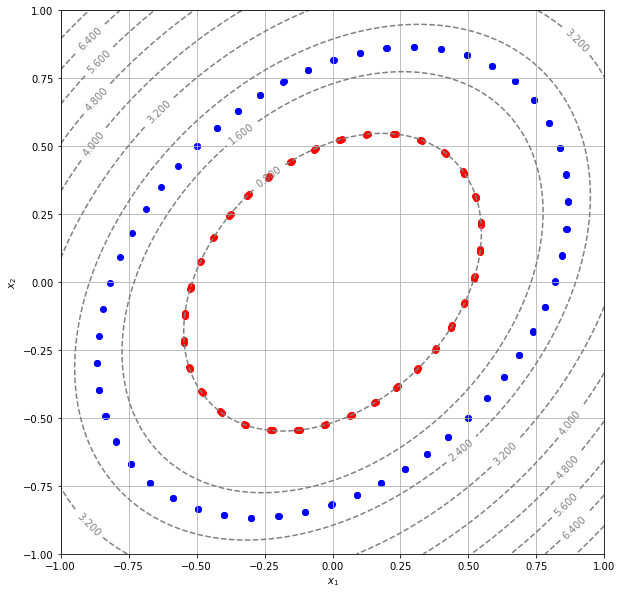

In [20]:
# Puis on code un nouveau graphe pour afficher les courbes de niveaux 
# et les points trouv√©s par l'algorithme pr√©c√©dent :

X1= level_curve(f1, -0.375, 0.25, 0.1, 100)[0] # on a choisi (x0, y0) √† peu pr√®s sur la courbe de niveau 0,8
Y1= level_curve(f1, -0.375, 0.25, 0.1, 100)[1] # et on r√©duit N pour √©viter que les points se superposent trop
X2= level_curve(f1, -0.5, 0.5, 0.1, 100)[0] 
Y2= level_curve(f1, -0.5, 0.5, 0.1, 100)[1]

display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)
 
plt.scatter(X1, Y1, c = 'red')
plt.scatter(X2, Y2, c = 'blue')
plt.show()


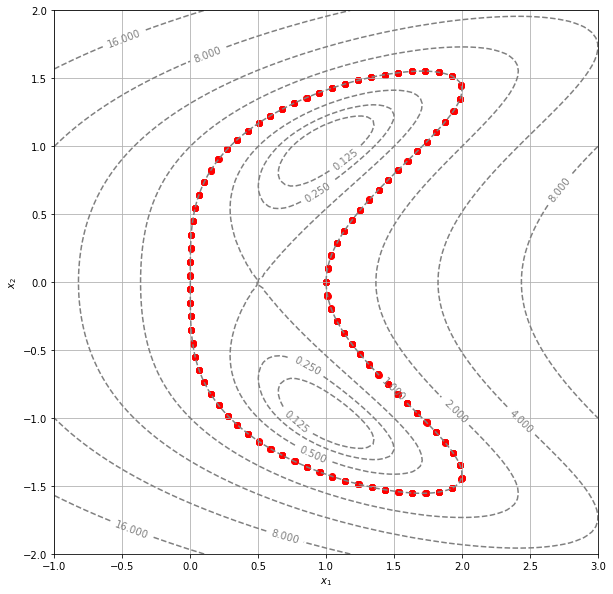

In [21]:
# pour la fonction f2
    
X1 = level_curve(f2, 1, 0, 0.1, 500)[0]
Y1 = level_curve(f2, 1, 0, 0.1, 500)[1]

display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)
plt.scatter(X1, Y1, c ='red')
plt.show()

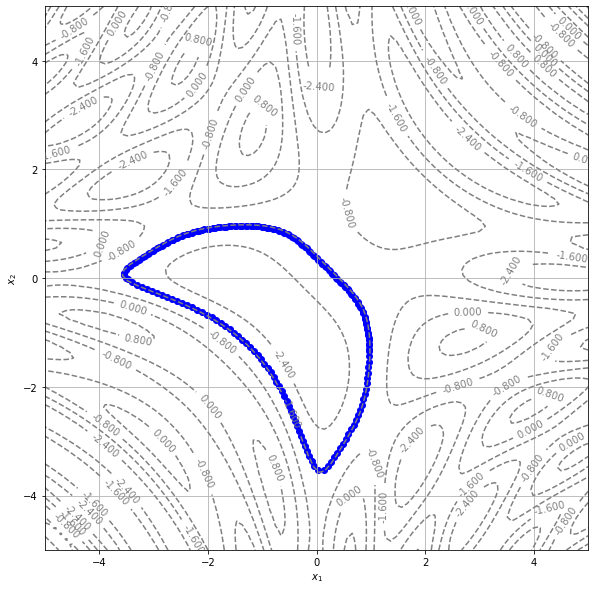

In [22]:
# et enfin f3

X3 = level_curve(f3, -3.5, 0, 0.1, 200)[0]
Y3 = level_curve(f3, -3.5, 0, 0.1, 200)[1]
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

plt.scatter(X3, Y3, c='blue')
plt.show()

#### Remarque :
Si N est trop grand, on fait le tour de la courbe de niveau plusieurs fois et les points se superposent.

### Bouclage et auto-intersection

L'algorithme pr√©c√©dent est malheureusement susceptible de faire plusieurs fois le tour d'une courbe de niveau donn√©e. 

#### Question 7 + T√¢che 4

Proposer une nouvelle impl√©mentation de `level_curve` qui arr√™te l'algorithme et renvoie les points connus quand le segment form√© par les deux derniers points produits intersecte l'un des segments produits auparavant. En √©tant (raisonnablement) optimiste, doit-t'on prendre la peine de tester l'intersection du dernier segment avec tous les segments d√©j√† produits (ce qui prend du temps ...) ou juste avec le premier ? Pour r√©pondre √† cette question, on pourra se demander si les courbes de niveau similaires √† celle de la fonction de Rosenbrock passant par le point $(0.5, 0)$ (cf. Exemples de r√©f√©rence) -- c'est-√†-dire "auto-intersectantes" -- sont fr√©quentes ou rares et pourquoi.

##### R√©ponse 7

Il suffit de v√©rifier que le premier segment n'intersecte pas le dernier, car √† ce moment l√† on aura fait le tour de la courbe de niveau.

Cela risque de ne pas fonctionner sur la courbe de Rosenbrock, mais ce genre de fonction est rare, car si cela arrive c'est g√©n√©ralement pour une seule courbe de niveau de la focntion.

In [23]:
# on cr√©e une fonction qui v√©rifie si deux segments ont une intersection

def intersect(x1, y1, x2, y2, x3, y3, x4, y4): # les points 1 et 2 sont les extr√©mit√©s du premier segment, 3 et 4 celles du 2√®me.
    
    inter = False # ce bool√©en restera False si on ne trouve pas d'intersection
    
    if x1 != x2 and x3 != x4 : # cas de doites y = ax + b avec √©ventuellement a = 0
        
        a1 = (y2 - y1)/(x2 - x1) # coefficient directeur de la 1√®re droite 
        a2 = (y4 - y3)/(x4 - x3)
    
        b1 = y1 - a1*x1  # ordonn√©e √† l'origine de la premi√®re droite
        b2 = y3 - a2*x3
        
        if a1 != a2 :
            # coordonn√©es du point d'intersection des droites
            x = (b2 - b1)/(a1 - a2)
            y = a1*x + b1
            inter = True
           
            
    elif x1 == x2 and x3 != x4 : # avec une des droite de la forme x=c
        c = x1
        a2 = (y4 - y3)/(x4 - x3)
        b2 = y3 - a2 * x3
        
        x = c
        y = a2 * x + b2
        inter = True
    
    elif x3 == x4 and x1 != x2 : # avec l'autre droite de la forme x=c
        c = x3
        a1 = (y2 - y1)/(x2 - x1) 
        b1 = y1 - a1*x1
        
        x = c
        y = a1*x + b1
        inter = True
        
    # ensuite on va v√©rifier que le point d'intersection des droites est sur les segments.
    
    if inter == False :# on v√©rifie que le point d'intersection existe
        return False
    
    else : 
        if (x1 <= x <= x2 or x2 <= x <= x1) and (x3 <= x <= x4 or x4 <= x <= x3): 
        # abscisse du point compris entre celles des extr√©mit√©s des 2 segments
            return True
        else : 
            return False 
    

In [24]:
# On teste si la fonction marche sur des exemples

intersect(0, 0, 3, 2, 0, 1, 3, 1)

True

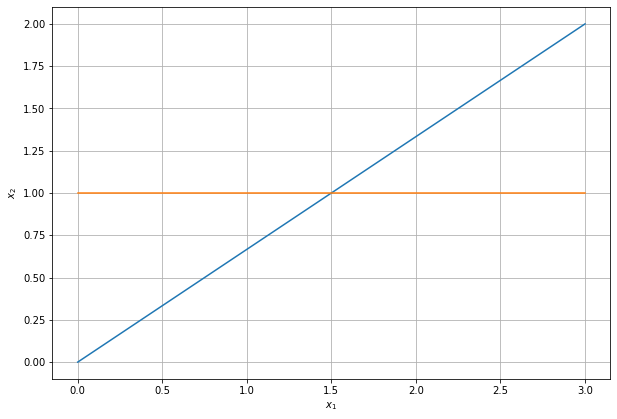

In [25]:
# illustration:

plt.grid(True)
plt.xlabel("$x_1$") 
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

abs1 = [0, 3] 
abs2 = [0, 3]
ord1 = [0, 2] 
ord2 = [1, 1]

plt.plot(abs1, ord1)
plt.plot(abs2, ord2)
plt.show()

In [26]:
# deuxi√®me exemple
intersect(0, 0, 2, 2, 6, 0, 6, 5)

False

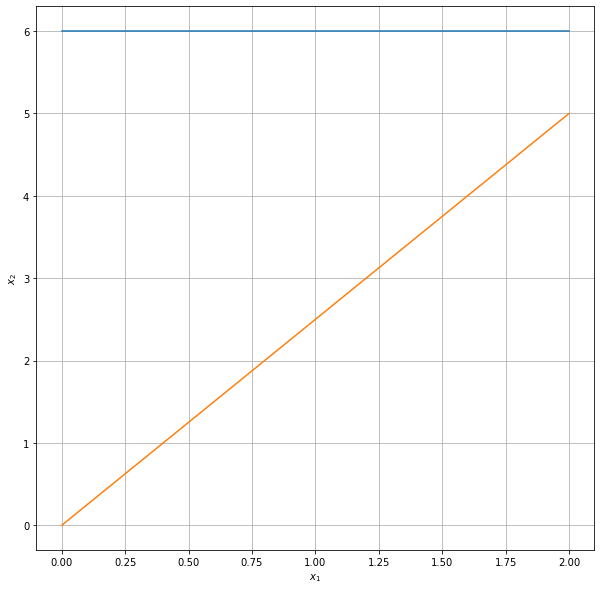

In [27]:
# illustration

plt.grid(True)
plt.xlabel("$x_1$") 
plt.ylabel("$x_2$")

abs1 = [0, 2] 
abs2 = [0, 2]
ord1 = [6, 6] 
ord2 = [0, 5]

plt.plot(abs1, ord1)
plt.plot(abs2, ord2)
plt.show()

In [28]:
# nouvelle fonction avec l'intersection comme condition d'arr√™t

def level_curve2(f, x0, y0, delta=0.1, N=1000, eps=eps):
    c = f(x0, y0)
    def F(x, y): 
# La fonction F de R2 dans R2 associ√©e √† la courbe de niveau c de f 
# avec la condition que la distance √† (x0, y0) soit √©gale √† delta
        return np.array([f(x, y) - c, np.sqrt((x - x0)**2 + (y - y0)**2) - delta]) 
    
    x0, y0 = float(x0), float(y0)
    gradf = grad(f)
    norm_grad = np.linalg.norm(gradf(x0, y0))
    Liste_points = [[x0, y0]] # la liste des points trouv√©s parla m√©thode de Newton
    x, y = x0, y0
    x_0, y_0 = x0, y0 # on stocke les valeurs initiales car on en a besoin dans la boucle pour l'intersection
    
    # On trouve les 3 premiers points issus de la m√©thode de Newton d'abord 
    # car les 2 premiers segements ont une extr√©mit√© en commun, il faut donc traiter ce cas √† part.
    
    for i in range(3):
        x0, y0 = x, y
        norm_grad = np.linalg.norm(gradf(x, y))
        rot_gradf = np.array([gradf(x, y)[1], -gradf(x, y)[0]]) # On fait tourner le gradient en (x, y) de 90¬∞ vers la droite
        decalage = delta/norm_grad * rot_gradf 
        x_int, y_int = x + decalage[0], y + decalage[1] # On d√©cale le point initial vers la droite
        
        # Ainsi, le point le plus proche trouv√© par la m√©thode de Newton sera bien le point √† droite de (x0, y0)
    
        x, y = Newton(F, x_int, y_int, N)
        Liste_points.append([x, y])
    
    x1, y1 = Liste_points[1][0], Liste_points[1][1] 
    x_n1, y_n1 = Liste_points[-2][0], Liste_points[-2][1] # l'avant dernier point calcul√©
    x, y = Liste_points[-1][0], Liste_points[-1][1] # le dernier point calcul√©
    
    while intersect(x_0, y_0, x1, y1, x_n1, y_n1,  x, y) == False :
        x0, y0 = x, y
        # On r√©initialise le point de r√©f√©rence pour que d√©sormais on calcule le prochain point 
        # √† distance delta du point trouv√© pr√©c√©demment.
        
        norm_grad = np.linalg.norm(gradf(x, y))
        rot_gradf = np.array([gradf(x, y)[1], -gradf(x, y)[0]])
        decalage = delta/norm_grad * rot_gradf 
        x_int, y_int = x + decalage[0], y + decalage[1]
        x_n1, y_n1 = x, y
        x, y, = Newton(F, x_int, y_int, N)
        Liste_points.append([x, y])
        
    
    Liste = np.array(Liste_points) # on transforme la liste en array
    L = Liste.T  
    
    return L

In [29]:
level_curve2(f1, 0.5, 0.4)

# on v√©rifie que la fonction marche et renvoie un tableau de taille (2, N) 
# dont la premi√®re liste est celle des abscisses et la deuxi√®me celle des ordonn√©es.

array([[ 0.5       ,  0.5410046 ,  0.55730368,  0.55237164,  0.53010841,
         0.49370944,  0.44555852,  0.38739463,  0.32049648,  0.24583262,
         0.16418501,  0.07627088, -0.01709792, -0.11475077, -0.21467199,
        -0.3131573 , -0.4038264 , -0.47805201, -0.52866221, -0.55390339,
        -0.55644774, -0.54025632, -0.50883227, -0.46484944, -0.41026541,
        -0.34651175, -0.27465772, -0.19554148, -0.10988894, -0.01845314,
         0.07777151,  0.17716339,  0.27677318,  0.37130529,  0.45272639,
         0.5127118 ],
       [ 0.4       ,  0.3087927 ,  0.21013111,  0.110251  ,  0.01275863,
        -0.08038354, -0.16802926, -0.24937547, -0.3237049 , -0.39022959,
        -0.44796967, -0.49562894, -0.5314431 , -0.55299405, -0.55704773,
        -0.53969117, -0.49751701, -0.43050654, -0.34425856, -0.24750032,
        -0.1475315 , -0.04884888,  0.04608744,  0.13589732,  0.21968777,
         0.29673128,  0.36628143,  0.42744399,  0.47905716,  0.51955214,
         0.54677865,  0.55781

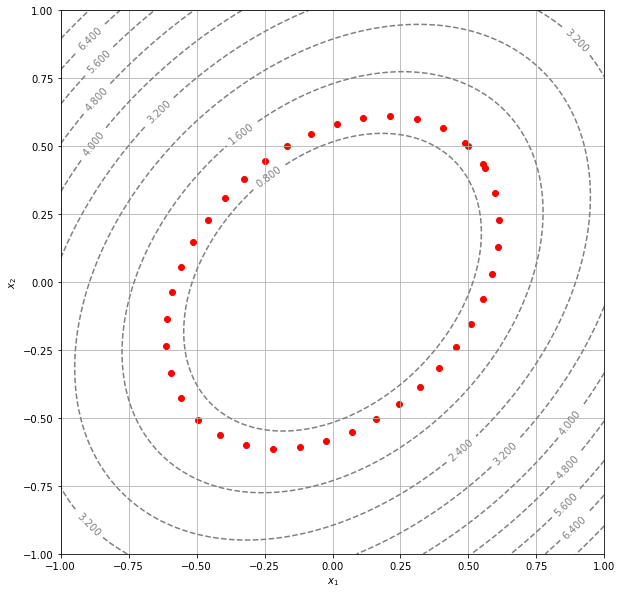

In [30]:
# Puis on code un nouveau graphe pour afficher les courbes de niveaux 
# et les points trouv√©s par l'algorithme pr√©c√©dent :

X1 = level_curve2(f1, 0.5, 0.5)[0] 
Y1 = level_curve2(f1, 0.5, 0.5)[1]

display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected)
)

plt.scatter(X1, Y1, c='red')
plt.show()

# On voit que l'algorithme s'arr√™te au bout d'un tour.

#### T√¢che 5

Valider graphiquement le r√©sultat au moyen des exemples de r√©f√©rence.

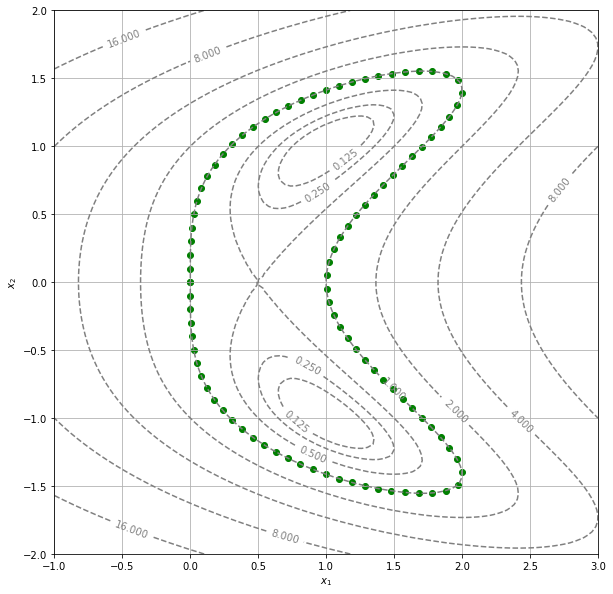

In [31]:
X1 = level_curve2(f2, 0, 0)[0] 
Y1 = level_curve2(f2, 0, 0)[1]

display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

plt.scatter(X1, Y1, c='green')
plt.show()

### Observation :
En revanche, lorsqu'on essaie avec des points qui se situent sur la courbe de niveau de f2 qui se croise (c = 0.5), un message d'erreur s'affiche. 
Voir les cellules √† la fin du devoir.

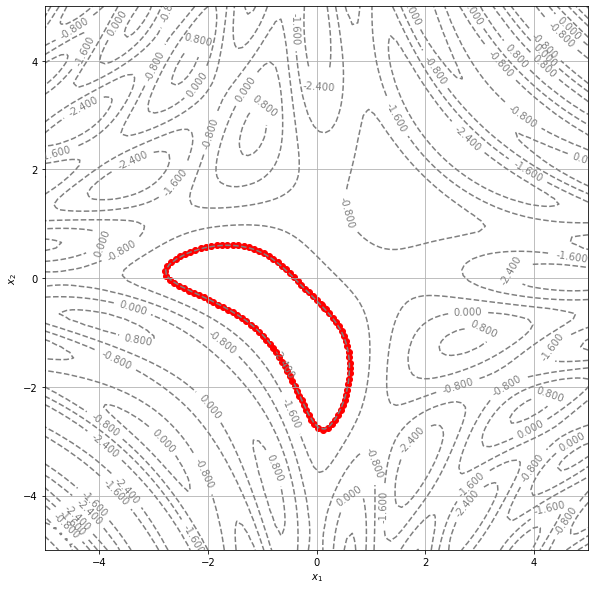

In [32]:
# pour la fonction f3:

X1 = level_curve2(f3, 0.1, -0.5)[0]
Y1 = level_curve2(f3, 0.1, -0.5)[1]

display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

plt.scatter(X1, Y1, c='red')
plt.show()

On a essay√© √† chaque fois de choisir des points initiaux qui se situent sur des courbes de niveau int√©ressantes.

## Post-traitement

Pour am√©liorer le rendu des courbes de niveau, il est tentant de diminuer la distance $\delta$ entre deux points cons√©cutifs. Malheureusement, dans des cas d'usage r√©alistes, il est fr√©quent que la fonction $f$ soit beaucoup plus complexe que les exemples qui nous avons consid√©r√©s. Le nombre de fois o√π cette fonction est appel√©e est alors le principal facteur qui d√©termine le temps de calcul des lignes de niveau. On cherche donc dans cette section √† am√©liorer la qualit√© visuelle des r√©sultats sans faire exploser le nombre d'√©valuation de la fonction $f$. On va chercher √† r√©soudre ce probl√®me en reliant les points successifs par des chemins plus "flexibles" que des segments de droites, ayant le potentiel de mieux coller aux lignes de niveau.

### Interpolation 

#### Question 8

Soit $P_1$ et $P_2$ deux points du plan et $u_1$ et $u_2$ deux vecteurs du plan non nuls.
On cherche √† produire un chemin $\gamma: [0,1] \to \mathbb{R}^2$ contin√ªment diff√©rentiable, joignant $P_1$ et $P_2$ ($\gamma(0) = P_1$ et $\gamma(1) = P_2$), tel que $\gamma'(0)$ soit dans la m√™me direction et le m√™me sens que $u_1$ et $\gamma'(1)$ soit dans la m√™me direction et le m√™me sens que $u_2$.

On recherche une telle solution sous la forme
$\gamma(t) = (x(t), y(t))$ o√π 
$$
x(t) = a + bt + ct^2 \; \mbox{ et } \; y(t) = d + et + ft^2
$$
et les param√®tres r√©els $a, b, c, d, e, f$ sont √† d√©terminer(*).


D√©terminer les coefficients $a, b, c, d, e, f$ solutions de ce probl√®me quand ils existent.
Expliciter si n√©cessaire les conditions que doivent remplir $P_1$, $P_2$, $u_1$ et $u_2$ pour qu'une solution existe.

(*) Cf. ["Mathematical Typography" de Donald E. Knuth](https://projecteuclid.org/euclid.bams/1183544082) pp. 354-359 (Bull. Amer. Math. Soc. (N.S.), Volume 1, Number 2 (1979), 337-372), pour une classe de chemins interpolants similaire mais plus complexe.

##### R√©ponse 8
Si on pose $P_1 = (x_1,y_1)$, $P_2 = (x_2,y_2)$, $u_1 = (a_1,b_1)$, $u_2 = (a_2,b_2)$

Sachant que $ùõæ(0)=P_1$ et $ùõæ(1)=P_2$, on a donc $a=x_1$ et $d=y_1$ puis on a le syst√®me:
$\left
\{
\begin{array}{c}
a+b+c=x_2\\d+e+f=y_2
\end{array}
\right.$

De plus, sachant que $ùõæ'(0)=u_1$ et $ùõæ'(1)=u_2$, on a :
$\left
\{
\begin{array}{c}
b=a_1\\e=b_1\\b+2c=a_2\\e+2f=b_2
\end{array}
\right.$
    
Donc en r√©solvant et en combinant les 2 syst√®mes, on a
$\left
\{
\begin{array}{c}
a=x_1\\b=2x_2-2x_1-a_2\\c=a_2-x_2+x_1\\d=y_1\\e=2y_2-2y_1-b_2\\f=b_2-y_2+y_1
\end{array}
\right.$

Pour qu'une telle fonction existe, il faut que $u_1$ et $u_2$ ne soient pas parall√®les afin de pouvoir avoir une solution polynomiale comme le pr√©conise l'√©nonc√©.

#### T√¢che 6

Impl√©menter la solution sous la forme d'une fonction `gamma` dont les arguments sont `t`, `P1`, `P2`, `u1` et `u2` et qui renvoie le ou les points $\gamma(t)$ associ√©s. Lorsqu'il n'existe pas de chemin de la forme souhait√©e pour les param√®tres `P1`, `P2`, `u1` et `u2`, on utilisera comment remplacement de $\gamma$ un chemin rectiligne interpolant lin√©airement les points $P_1$ et $P_2$.

Pour des raisons de performance, on vectorisera cette fonction par rapport √† `t` : 

  - en acceptant comme argument `t` des tableaux NumPy (monodimensionels) de nombres flottants et en renvoyant alors un tableau de taille `(2, len(t))` flottants d√©crivant l'abscisse et l'ordonn√©e des `len(t)` points $\gamma(t)$ correspondant,

  - en appliquant directement op√©rateurs et fonctions math√©matiques aux tableaux NumPy, sans utiliser de boucle `for`,
  
On validera ensuite graphiquement l'impl√©mentation sur un exemple o√π l'on repr√©sentera les point $P_1$ et $P_2$, les tangentes associ√©es et le chemin $\gamma$ correspondant.




In [33]:
# 1√®re fonction pas vectoris√©e

def gamma(t, P1, P2, u1, u2):
    u1, u2 = np.array(u1), np.array(u2) # on vectorise u1 et u2 si ce n'est pas d√©j√† fait
    x1, y1 = P1[0], P1[1]
    x2, y2 = P2[0], P2[1]
    a1, b1 = u1[0], u1[1]
    a2, b2 = u2[0], u2[1]
    if np.cross(u1, u2) != 0:
        a = x1
        b = 2*x2-2*x1-a2
        c = a2-x2+x1
        d = y1
        e = 2*y2-2*y1-b2
        f = b2-y2+y1
        return (a + b*t + c*t**2, d + e*t + f*t**2)
    else:
        return (x1*(1-t)+x2*t, y1*(1-t)+y2*t)

#2√®me fonction vectoris√©e, dans laquelle on ne peut pas utiliser la fonction np.vectorize car gamma a plusieurs arguments.
# Nous n'avons pas su comment faire sans boucle for

def gamma_vectorized(T, P1, P2, u1, u2):
    Liste_points = []
    for t in T:
        Liste_points.append(gamma(t, P1, P2, u1, u2)) 
    L = np.array(Liste_points)
    return L.transpose() # pour avoir un tableau (2, len(gamma(T)))

In [34]:
gamma(0.5, (0, 0), (1, 1), [3, 4], [3, 4])

(0.5, 0.5)

In [35]:
# v√©rification
gamma_vectorized([0.2, 0.4, 0.6, 0.8], (0, 0), (1, 1), [3, 4], [3, 4])

array([[0.2, 0.4, 0.6, 0.8],
       [0.2, 0.4, 0.6, 0.8]])

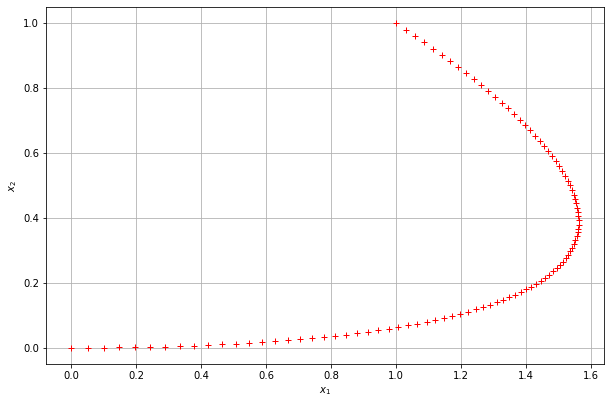

In [36]:
# en prenant des vecteurs et des point au hasard :

T = np.linspace(0, 1, 100) # on choisit 100 points entre 0 et 1
Y = gamma_vectorized(T, (0, 0), (1, 1), [3, 4], [-3, 2])

plt.grid(True)
plt.xlabel("$x_1$") 
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")
plt.plot(Y[0], Y[1], 'r+')
plt.show()

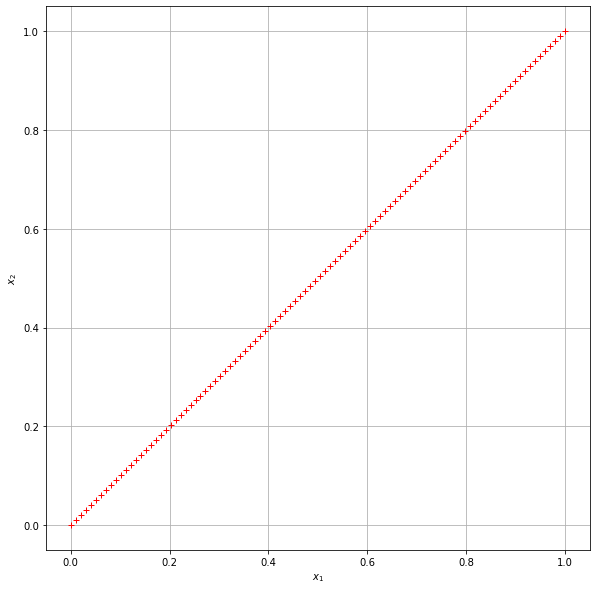

In [37]:
T = np.linspace(0, 1, 100) 
Y = gamma_vectorized(T, (0, 0), (1, 1), [3, 4], [3, 4]) # ici u1 et u2 sont colin√©aires

plt.grid(True)
plt.xlabel("$x_1$") 
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")
plt.plot(Y[0], Y[1], 'r+')
plt.show()

# on obtient bien une droite. 

### Int√©gration

#### T√¢che 7
Int√©grer le m√©canisme d'interpolation dans (une nouvelle version de) la fonction `level_curve` qui accepte un nouveau param√®tre entier `oversampling` (sur-√©chantillonnage) tel que :

  - si `oversampling == 1`, la fonction `level_curve` fonctionne comme pr√©c√©demment,

  - si `oversampling > 1`, la fonction `level_curve` introduit dans son r√©sultat `oversampling - 1` points suppl√©mentaires obtenus par interpolations entre chaque couple de points cons√©cutifs obtenus par la m√©thode de Newton.

In [38]:
def level_curve3(f, x0, y0, oversampling, delta=0.1, N=1000, eps=eps):
    
    # m√™me code initial que pour level_curve2
    
    c = f(x0, y0)
    def F(x, y): 
        return np.array([f(x, y) - c, np.sqrt((x - x0)**2 + (y - y0)**2) - delta]) 
    
    x0, y0 = float(x0), float(y0)
    gradf = grad(f)
    norm_grad = np.linalg.norm(gradf(x0, y0))
    Liste_points = [[x0, y0]] # la liste des points trouv√©s parla m√©thode de Newton
    x, y = x0, y0
    x_0, y_0 = x0, y0 # on stocke les valeurs initiales car on en a besoin dans la boucle pour l'intersection
    
    for i in range(3):
        x0, y0 = x, y
        norm_grad = np.linalg.norm(gradf(x, y))
        rot_gradf = np.array([gradf(x, y)[1], -gradf(x, y)[0]]) # On fait tourner le gradient en (x, y) de 90¬∞ vers la droite
        decalage = delta/norm_grad * rot_gradf 
        x_int, y_int = x + decalage[0], y + decalage[1] # On d√©cale le point initial vers la droite
    
        x, y = Newton(F, x_int, y_int, N)
        Liste_points.append([x, y])
    
    x1, y1 = Liste_points[1][0], Liste_points[1][1] 
    x_n1, y_n1 = Liste_points[-2][0], Liste_points[-2][1] # l'avant dernier point calcul√©
    x, y = Liste_points[-1][0], Liste_points[-1][1] # le dernier point calcul√©
    
    while intersect(x_0, y_0, x1, y1, x_n1, y_n1,  x, y) == False :
        x0, y0 = x, y
        # On r√©initialise le point de r√©f√©rence pour que d√©sormais on calcule le prochain point 
        # √† distance delta du point trouv√© pr√©c√©demment.
        
        norm_grad = np.linalg.norm(gradf(x, y))
        rot_gradf = np.array([gradf(x, y)[1], -gradf(x, y)[0]])
        decalage = delta/norm_grad * rot_gradf 
        x_int, y_int = x + decalage[0], y + decalage[1]
        x_n1, y_n1 = x, y
        x, y, = Newton(F, x_int, y_int, N)
        Liste_points.append([x, y])

            # c'est l√† que le code change
            
        T = np.linspace(0, 1, oversampling - 1)
        P1 = (x_n1, y_n1)
        P2 = (x, y)
        
        # Puis on fait une rotation des deux gradients pour avoir des vecteurs colin√©aires aux tangentes en P1 et P2.
        u1 = np.array([grad(f)(x_n1, y_n1)[1], -grad(f)(x_n1, y_n1)[0]]) 
        u2 = np.array([grad(f)(x, y)[1], -grad(f)(x, y)[0]])
        
        # Enfin on classe de nouveau les points par couple (x, y) en transposant gamma vectoris√©
        # et on ajoute chaque couple √† la liste de points trouv√©s par la m√©thode de Newton
        
        points_supp = gamma_vectorized(T, P1, P2, u1, u2).transpose() 
        for point in points_supp:
            Liste_points.append(point)
    
    Liste = np.array(Liste_points) # on transforme la liste en array
    L = Liste.T  
    
    return L

In [39]:
level_curve3(f1, -0.375, 0.25, 3)

array([[-0.375     , -0.30741178, -0.23197875, -0.14950293, -0.06073392,
        -0.14950293, -0.06073392,  0.03344794, -0.06073392,  0.03344794,
         0.13171798,  0.03344794,  0.13171798,  0.23172178,  0.13171798,
         0.23172178,  0.3290884 ,  0.23172178,  0.3290884 ,  0.41649526,
         0.3290884 ,  0.41649526,  0.48485303,  0.41649526,  0.48485303,
         0.52801012,  0.48485303,  0.52801012,  0.54578385,  0.52801012,
         0.54578385,  0.54167218,  0.54578385,  0.54167218,  0.51975025,
         0.54167218,  0.51975025,  0.4833662 ,  0.51975025,  0.4833662 ,
         0.4350051 ,  0.4833662 ,  0.4350051 ,  0.37646819,  0.4350051 ,
         0.37646819,  0.30907241,  0.37646819,  0.30907241,  0.23381184,
         0.30907241,  0.23381184,  0.15149104,  0.23381184,  0.15149104,
         0.06285904,  0.15149104,  0.06285904, -0.03120967,  0.06285904,
        -0.03120967, -0.12940599, -0.03120967, -0.12940599, -0.229409  ,
        -0.12940599, -0.229409  , -0.32690787, -0.2

#### T√¢che 8

Valider graphiquement le r√©sultat au moyen des exemples de r√©f√©rence.

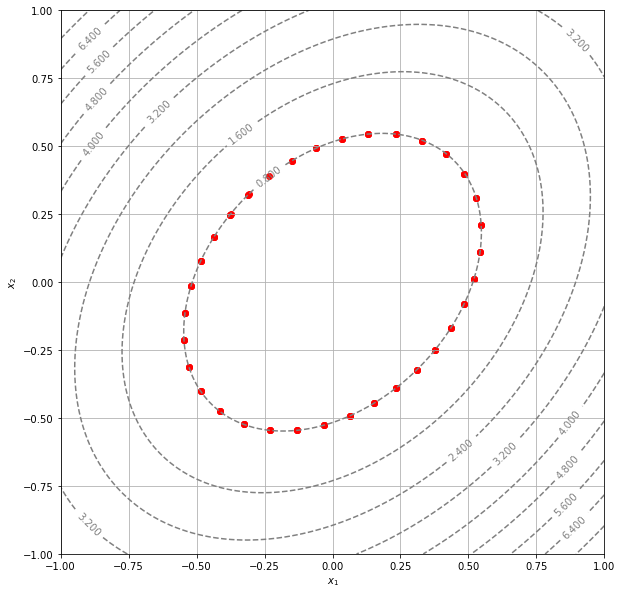

In [40]:
# Pour la fonction f1 et oversampling = 3

X1 = level_curve3(f1, -0.375, 0.25, 3)[0]
Y1 = level_curve3(f1, -0.375, 0.25, 3)[1] 

display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

plt.scatter(X1, Y1, c='red')
plt.show()

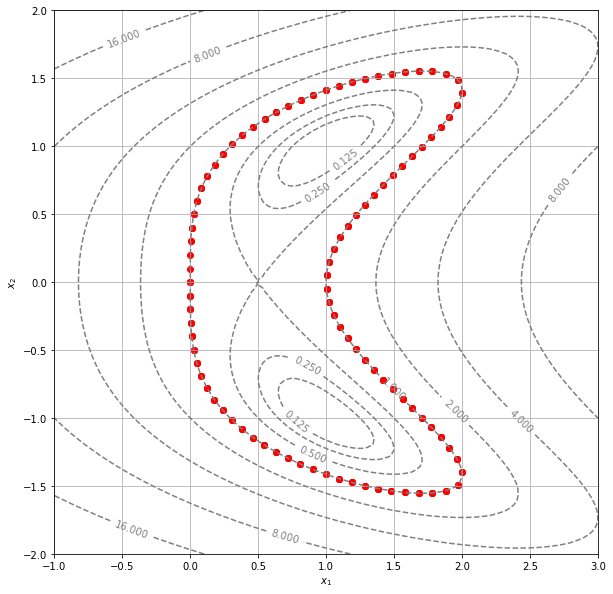

In [41]:
# avec la deuxi√®me fonction et oversampling = 3

X2 = level_curve3(f2, 0, 0, 3)[0]
Y2 = level_curve3(f2, 0, 0, 3)[1] 

display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

plt.scatter(X2, Y2, c='red')
plt.show()

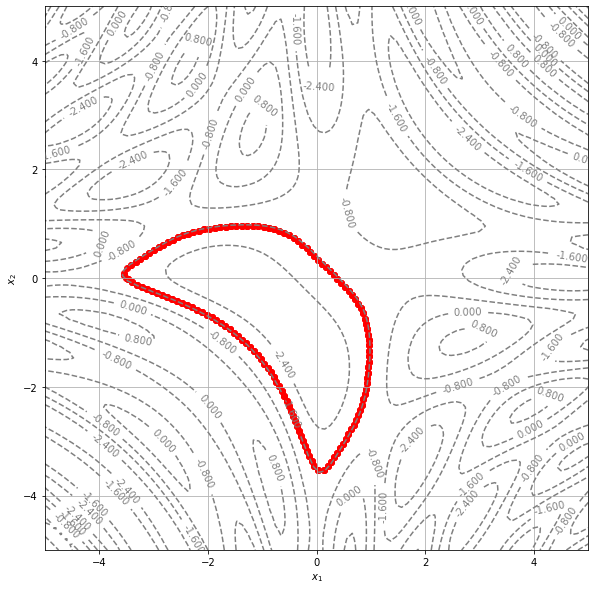

In [42]:
# avec la fonction f3

X4 = level_curve3(f3, -3.5, 0, 3)[0]
Y4 = level_curve3(f3, -3.5, 0, 3)[1]
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

plt.scatter(X4, Y4, c='red')
plt.show()

In [ ]:
# En revanche l'algorithme beugue toujours pour la courbe de niveau c = 0.5 ... 

X3 = level_curve3(f2, 1.5, 1, 3)[0]
Y3 = level_curve3(f2, 1.5, 1, 3)[1] 

display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

plt.scatter(X3, Y3, c='orange')
plt.show()

In [ ]:
# avec la courbe de niveau c = 0.5 de la fonction f2

X1 = level_curve2(f2, 0.5, 0)[0] 
Y1 = level_curve2(f2, 0.5, 0)[1]

display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

plt.scatter(X1, Y1, c='green')
plt.show()